# This Notebook is dedicated to prediciting The Price

In [85]:
# Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor

import pickle
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt

In [86]:
#Open file
with open('Clean_Final_Project.pickle', 'rb') as data:
        dataset = pickle.load(data)

In [87]:
orginal_dataset = pd.read_csv('kc_house_data.csv')

In [88]:
#Set orginal lat and long
dataset['lat']=orginal_dataset['lat']
dataset['long'] =orginal_dataset['long']

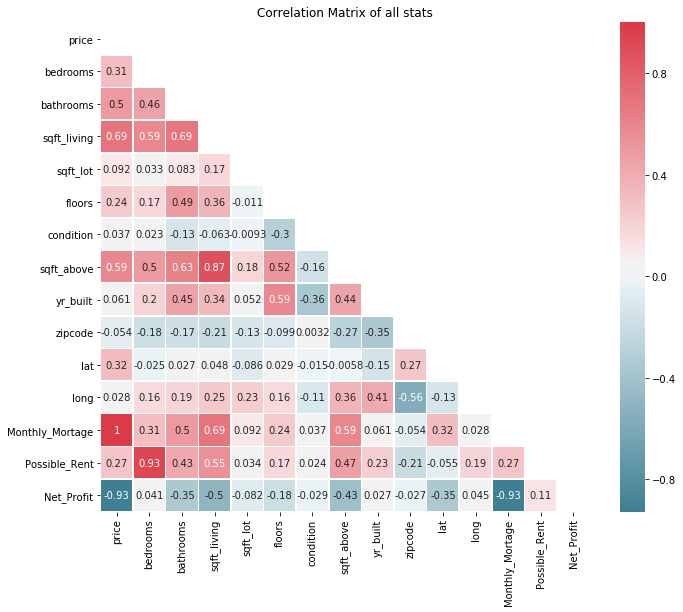

In [89]:
# Compute the correlation matrix
data = dataset[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','yr_built','zipcode','lat','long','Monthly_Mortage','Possible_Rent']]

corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all stats')
plt.show()

Text(0, 0.5, 'floors')

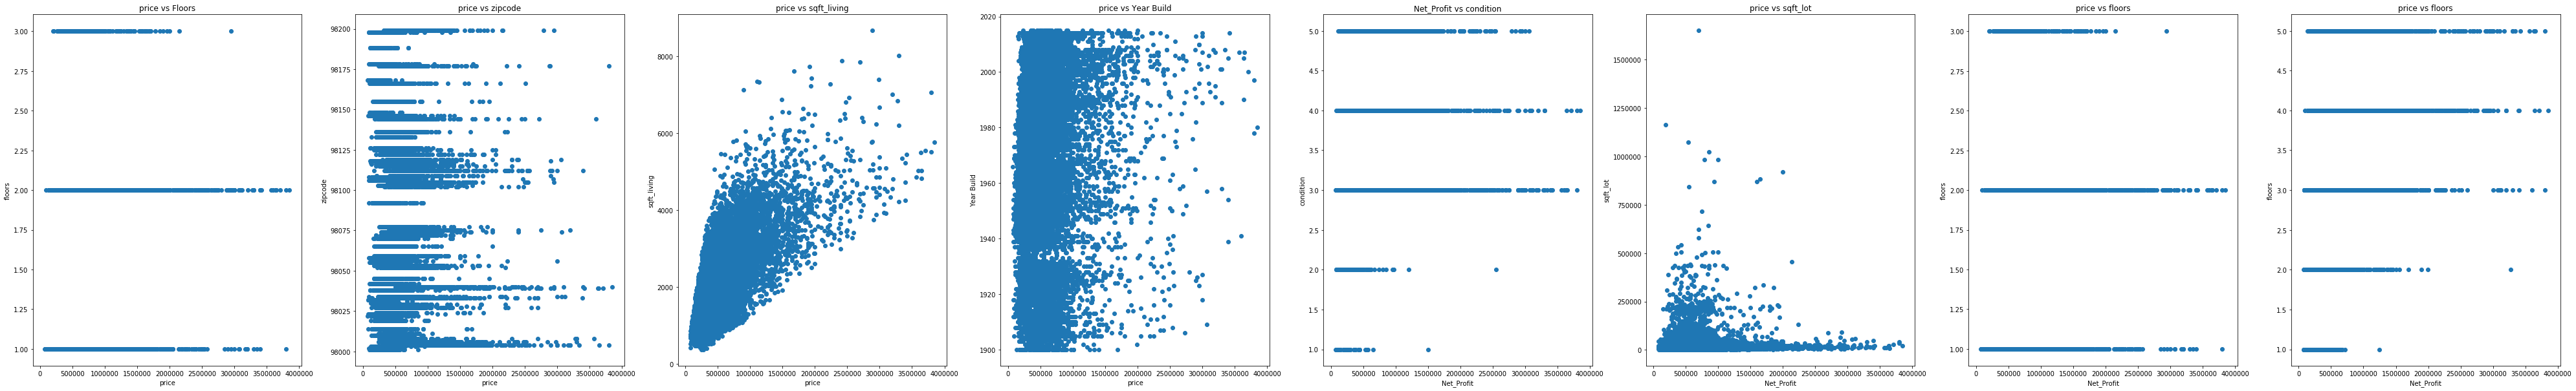

In [90]:
plt.figure(figsize=(70,10))

plt.subplot(1,8,1)
plt.scatter(dataset["price"], dataset["floors"])
plt.title("price vs Floors")
plt.xlabel('price')
plt.ylabel('floors')

plt.subplot(1,8,2)
plt.scatter(dataset["price"], dataset["zipcode"])
plt.title("price vs zipcode")
plt.xlabel('price')
plt.ylabel('zipcode')

plt.subplot(1,8,3)
plt.scatter(dataset["price"], dataset["sqft_living"])
plt.title("price vs sqft_living")
plt.xlabel('price')
plt.ylabel('sqft_living')

plt.subplot(1,8,4)
plt.scatter(dataset["price"], dataset["yr_built"])
plt.title("price vs Year Build")
plt.xlabel('price')
plt.ylabel('Year Build')




plt.subplot(1,8,5)
plt.scatter(dataset["price"], dataset["condition"])
plt.title("Net_Profit vs condition")
plt.xlabel('Net_Profit')
plt.ylabel('condition')


plt.subplot(1,8,6)
plt.scatter(dataset["price"], dataset["sqft_lot"])
plt.title("price vs sqft_lot")
plt.xlabel('Net_Profit')
plt.ylabel('sqft_lot')




plt.subplot(1,8,7)
plt.scatter(dataset["price"], dataset["floors"])
plt.title("price vs floors")
plt.xlabel('Net_Profit')
plt.ylabel('floors')


plt.subplot(1,8,8)
plt.scatter(dataset["price"], dataset["bedrooms"])
plt.title("price vs floors")
plt.xlabel('Net_Profit')
plt.ylabel('floors')




In [91]:
# This function is to find Bivariate analysis

def data_function(data1,data2):

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
    dataset['price'] = (dataset['price'] - dataset['price'].mean()) / dataset['price'].std()
    dataset[data1] = (dataset[data1] - dataset[data1].mean()) / dataset[data1].std()

    t = sns.regplot(
    data1,
    'price',
    dataset,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title(data2)

    sns.regplot(data1,'price',
            dataset, 
            scatter=False, 
            color="red")

    plt.show()
    
    

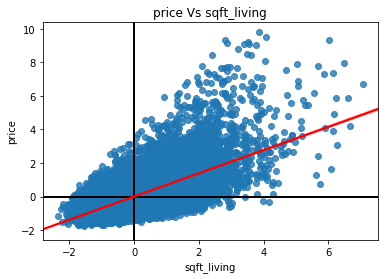

In [92]:
data_function('sqft_living',"price Vs sqft_living")

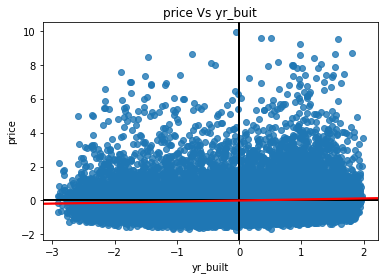

In [93]:
data_function('yr_built',"price Vs yr_buit")

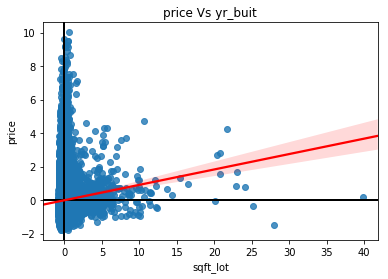

In [94]:
data_function('sqft_lot',"price Vs yr_buit")

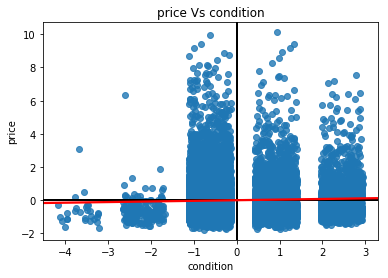

In [95]:
data_function('condition',"price Vs condition")

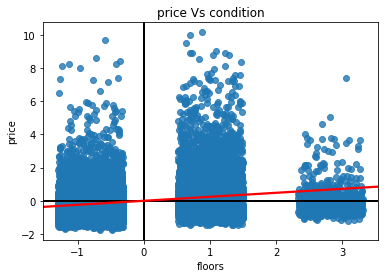

In [96]:
data_function('floors',"price Vs condition")

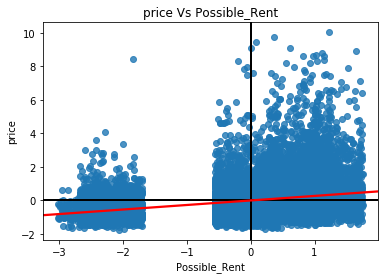

In [97]:
data_function('Possible_Rent',"price Vs Possible_Rent")

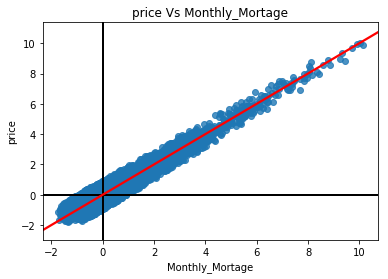

In [98]:
data_function('Monthly_Mortage',"price Vs Monthly_Mortage")

In [99]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,Monthly_Mortage,Possible_Rent
0,221900,3,1,1180,5650,1,3,1180,1955,98178,47.5112,-122.257,1008.86,2750.0
1,538000,3,2,2570,7242,2,3,2170,1951,98125,47.7210,-122.319,2445.99,2750.0
2,180000,2,1,770,10000,1,3,770,1933,98028,47.7379,-122.233,818.36,1500.0
3,604000,4,3,1960,5000,1,5,1050,1965,98136,47.5208,-122.393,2746.06,3250.0
4,510000,3,2,1680,8080,1,3,1680,1987,98074,47.6168,-122.045,2318.69,2750.0


In [100]:
# Drop columns

#Dropping columns
data.drop(['lat','long','Monthly_Mortage','Possible_Rent','yr_built',],axis = 1,inplace = True)

In [101]:
#Split data into training and testing set with 90% of the data going into training
training, testing = train_test_split(dataset, test_size=0.1, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 21257; training sample size = 19131, testing sample size = 2126


In [102]:
#training and testing
df_train = training.loc[:,data.columns]
X_train = df_train.drop(['price'], axis=1)
y_train = df_train.loc[:, ['price']]

df_test = testing.loc[:,data.columns]
X_test = df_test.drop(['price'], axis=1)
y_test = df_test.loc[:, ['price']]

# Linear

In [103]:
from sklearn.model_selection import cross_val_score
# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv=5)

In [104]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.49760507335466464
Root Mean Squared Error: 0.6636187767743418
Average 5-Fold CV Score: 0.512378770460326
[0.49971413 0.50909944 0.51658622 0.53567446 0.5008196 ]


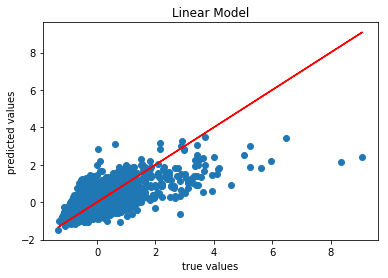

In [105]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Linear Model")
plt.show()

# Random Forest

In [106]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [107]:
#Random Forest
print("R^2: {}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.7434007341076232
Root Mean Squared Error: 0.47426791827444337
Average 5-Fold CV Score: 0.7397005259304896
[0.70754477 0.73416901 0.7398083  0.75220641 0.76477414]


# Ridge 

In [108]:
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_s_r = ridge.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_r = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [109]:
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_r))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_r)))
# Print the 5-fold cross-validation scores
print(cv_scores_r)

R^2: 0.4976165790435886
Root Mean Squared Error: 0.6636111777376865
Average 5-Fold CV Score: 0.7382231884349866
[0.71173897 0.72662298 0.73912834 0.75730418 0.75632147]


# Lasso

In [110]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_s_l = lasso.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_l = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [111]:
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_l))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_l)))
# Print the 5-fold cross-validation scores
print(cv_scores_l)

R^2: 0.3826648838500659
Root Mean Squared Error: 0.7356250912334488
Average 5-Fold CV Score: 0.7424664047473418
[0.71918176 0.74149122 0.74948074 0.75242344 0.74975486]


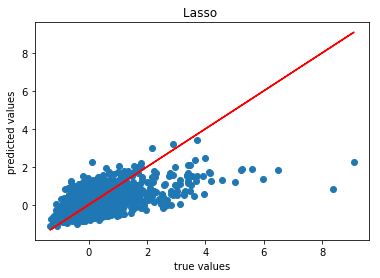

In [112]:
plt.scatter(y_test, y_pred_s_l)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Lasso ")
plt.show()

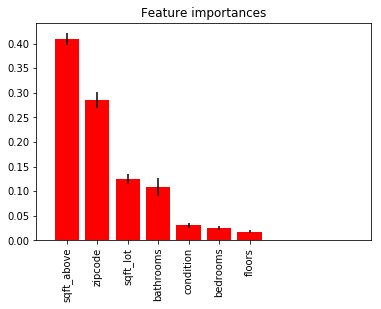

In [65]:
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.show()

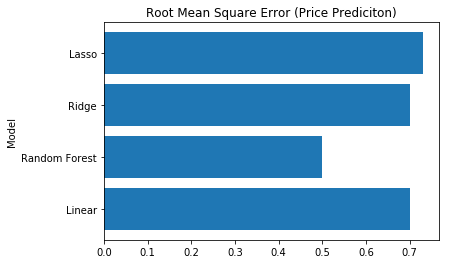

In [114]:
objects = ('Linear', 'Random Forest','Ridge','Lasso')
y_pos = np.arange(len(objects))
performance = [0.70,0.50,0.70,0.73]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.ylabel('Model')
plt.title('Root Mean Square Error (Price Prediciton)')

plt.show()
plt.show()